# (3) Perceptron for linear regression, towards artificial neural networks

## introduction to machine learning for materials science

For several years, the hottest topic in machine learning has been neural networks. Before getting into more complex network structures, it is instructive to start with probably the most simple neural network, the perceptron.

A neuron in the present context is a unit that takes one or more inputs, calculates the sum of these inputs, passes this sum as argument to an activation function $A(Z)$, and uses the result as output. In the first figure, the input is composed of $n$ values $x_i$ and one constant value of $1$. Each of these inputs can be considered an input neuron (blue). The green neuron takes these inputs, multiplies each $x_i$ by a value $w_i$, the constant input by $b$, and computes the sum 

$$Z = \sum_{i=1}^n w_i \cdot x_i + b$$

The $x_i$s are the independent variables of one data set member $X^{j}$. Each $n$-dimensional data point $(X^{j}, y^{j})$ has $n$ $x_i^{i}$s and one or more dependent $y^{j}$s, so that $y^{j} = f(x_1^{j}, x_2^{j}, ..., x_n^{j})$. A neural network helps to find an estimation of the function $f$. The perceptron can help here if $f$ is linear in all $x_i$. For this, you need a large number of data points $X^{j}$, a single one won't do the job.

<br>
<img src="./images/perceptron_large.svg" width="500" />
<br>

In the original perceptron, this weighted sum is used as argument in the activation function, a Heaviside step function

$$A(Z) = \begin{cases}
      1 & \text{if}\ Z \geq 0 \\
      0 & \text{otherwise}
    \end{cases} $$

The Heaviside step function is used for classification problems, where the input is attributed to different classes. Maybe we cover this in the future.

The *learning* in machine learning originates from algorithmic approaches to updating (learning) the weights and bias in the model. The rules we will use are summarized as follows:

1. initialize the weights to small random numbers
2. for each training sample $X^j$ <br>
    (i) calculate the output value (the prediction) <br>
    (ii) update the weights by adding a number proportional to the error (expected value minus predicted value )
    
Updating the weights is done by
$w_i^{j, \text{new}} = w_i^{j, \text{old}} + \Delta w_i^{j, \text{old}}$, 
where
$\Delta w_i^{j, \text{old}} = \eta (y_i^j-A(Z_i^j))x_i^j$

$\eta$ is called the learning rata and has a value $<1$. The term $(y_i-A(Z_i))$ is the difference between the dependent variable $y_i$ and the estimated/predicted value by the perceptron $A(Z_i)$.

While writing this I realized how confusing the previous paragraph is, and I will try to make this clearer in the future. For now, check this [link](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html), or this [one](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/), or this [one](https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/). The next part will again be more straigt forward.

Originally developed for classification problems, we can use the perceptron for linear regression by leaving out the activation function. With one independent variable $X$ and one dependent variable $y$, all we need is the bias $b$ and one weight $w$. This yields as output of the output neuron the weighted sum $w \cdot X+b$, which is not fed through an activation function. With the above described learning rules, which update $w$ and $b$ such as to minimize the prediction error between $Z = w \cdot X+b$ and $y$, we can find the best linear fit.

<br>
<img src=".\images\perceptron_small.svg" width="300" />
<br>

The code below implements the neural network of this figure along with the learning rules. We can then use this self-implemented perceptron to find linear fits to some of the previously described data.

For a more detaileds on artificial neurons, the perceptron and the learning rules see this [post](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html) and also [wikipedia](https://en.wikipedia.org/wiki/Perceptron)

The following code is heavily influenced by another post on the [perceptron](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/) and is only marginally adapted.

In [1]:
import numpy as np

#the function 'initialize_weights' sets the parameters w, b to random number close to zero

def initialize_weights(n_data):
    np.random.seed()
    w = np.random.randn(1, n_data)*0.01
    b = np.zeros((1, n_data))
    return w, b

#the function 'forward' calculates w*X+b, the weighted sum, which ideally should be equal to y.

def forward(X_,w_,b_):
    Z = np.dot(w_,X_)+b_
    return Z

'''
in the following fit function, the weights (w, b) are initialized and subsequently constantly updated
for the data (X, y) and the weights (w, b) a loop runs over the number of epochs (n_epochs), i.e. the number of learning cycles
during each cycle, the error, i.e. the deviation of each datapoint from the fit w*X+b is calculated
this error is used to update w & b according to the learning rules specified above, and using the learning rate eta
'''

def perceptron_fit(X, y, eta, n_epochs):
    
    #first thing is to initialize the parameter w and b.
    #this is done calling the external function 'initialize_weights'
    
    w, b = initialize_weights(X.shape[1])
    
    #loop over the number of training cylces (n_epochs)
    for epoch in range(n_epochs):
        sum_error = 0.0
        
        #loop over all datapoints
        for i in range(X.shape[0]):
            
            #calling the prediction function 'forward' which calculates w*X+b and storing this in the variable 'prediction'
            prediction = forward(X[i], w, b)
            
            #calculating the prediciton error as the difference between the datapoint y and the estimate (w*X+b) 
            error = y[i]-prediction
            
            #calculating the total error as the sum of squared error of each datapoint
            sum_error = sum_error + error**2
            
            #the follwoing lines are the learning part, where the parameter w & b get updated.
            #according to Rosenblatt's rules, b gets updated once in each epoch and w once for each data point
            
            b = b + eta * error
            for j in range(X.shape[1]):
                w = w + eta * error * X[i]
                
            #end of learning section    
                
        #printing the total error of each epoch        
        print('>epoch=%d, error=%.3f' % (epoch, sum_error))
        
    return w, b

    #the updated/learned weights w & b are returned and describe a linear fit to the input data

The following code is taken from the [notebook](https://github.com/ricogutzler/MPI-FKF-ml4ms/blob/master/2_regression.ipynb) on linear regression and generates a linear data set with noise.

We use the above defined perceptron to calculate a linear fit to the data.

In [2]:
a = 2
b = 5

#linspace generates an array with equally spaced entries in a given interval.
#Here the interval starts at int_start, ends at int_end, and has n_points entries.

int_start = -20
int_end = 20
n_points = 100

X = np.linspace(int_start,int_end,n_points).reshape(-1,1)
y = a*X + b

#random.normal draws random numbers from a normal distribution.
#The center of the distribution (mean) is at mu, the standard deviation is sigma.

mu, sigma = 0, 1

noise = np.random.normal(mu, sigma, X.shape)
X = X + noise

'''
all the above is taken from the previous notebook.
the following lines define the learning rate eta and the number of iterations (epochs)
during which the weights are updated.
'''
eta = 0.002
n_epochs = 80

weights = perceptron_fit(X, y, eta, n_epochs)
print("w = " + str(weights[0]) + ", b = " + str(weights[1]))

>epoch=0, error=2250.019
>epoch=1, error=955.042
>epoch=2, error=853.107
>epoch=3, error=766.838
>epoch=4, error=693.864
>epoch=5, error=632.171
>epoch=6, error=580.050
>epoch=7, error=536.044
>epoch=8, error=498.920
>epoch=9, error=467.627
>epoch=10, error=441.273
>epoch=11, error=419.103
>epoch=12, error=400.473
>epoch=13, error=384.838
>epoch=14, error=371.734
>epoch=15, error=360.770
>epoch=16, error=351.613
>epoch=17, error=343.980
>epoch=18, error=337.631
>epoch=19, error=332.365
>epoch=20, error=328.009
>epoch=21, error=324.418
>epoch=22, error=321.470
>epoch=23, error=319.060
>epoch=24, error=317.101
>epoch=25, error=315.518
>epoch=26, error=314.248
>epoch=27, error=313.240
>epoch=28, error=312.449
>epoch=29, error=311.837
>epoch=30, error=311.372
>epoch=31, error=311.029
>epoch=32, error=310.786
>epoch=33, error=310.623
>epoch=34, error=310.525
>epoch=35, error=310.480
>epoch=36, error=310.477
>epoch=37, error=310.506
>epoch=38, error=310.561
>epoch=39, error=310.635
>epoch=40

With these simple learning rules of the perceptron, a single layer neural network, we can find decent fitting parameters. The follwing graph shows the datapoints and the fitted linear estimation. Depending on the noise level, the error will of course be larger or smaller. With this data set, weight and bias, i.e. estimated $a$ and $b$ are within a few percent of the expected values.

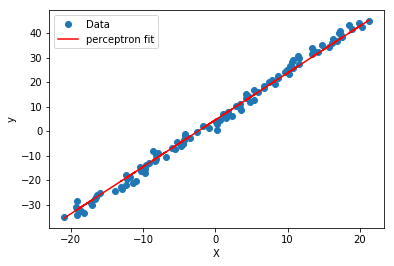

In [6]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'o', label='Data', markersize=6)
plt.plot(X, weights[0]*X + weights[1], 'r', label='perceptron fit')
plt.legend()
plt.xlabel('X')  
plt.ylabel('y')
plt.show()

Take home message: a simple neuron can fit a linear function. As we will see next time, a complex neural network with many more neurons and layers can fit much more complex functions.

In real-world data sets, the perceptron performs equally well. This is exemplified by the energy gap vs. LUMO plot of the gdb9 data set.

In [4]:
import pandas as pd

header_names=["N/A", "ID", "Rotational constant A", "Rotational constant B", "Rotational constant C", 
              "Dipole moment", "Isotropic polarizability", "Energy of HOMO", "Energy of LUMO", 
             "Gap (E_LUMO−E_HOMO)", "Electronic spatial extent", "Zero point vibrational energy", 
             "Internal energy at 0 K", "Internal energy at 298.15 K", "Enthalpy at 298.15 K", 
             "Free energy at 298.15 K", "Heat capacity at 298.15 K"]

df = pd.read_csv('gdb9_features.csv', sep = ', ', header=None, names=header_names)
df = df.drop(["N/A", "ID"], axis=1)

y3 = df["Gap (E_LUMO−E_HOMO)"].values.reshape(-1,1)
X3 = df["Energy of LUMO"].values.reshape(-1,1)

weights3 = perceptron_fit(X3, y3, eta, n_epochs)
print("w3 = " + str(weights3[0]) + ", b3 = " + str(weights3[1]))

C:\Users\gutzler\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


>epoch=0, error=42.814
>epoch=1, error=21.954
>epoch=2, error=20.411
>epoch=3, error=19.014
>epoch=4, error=17.750
>epoch=5, error=16.606
>epoch=6, error=15.570
>epoch=7, error=14.632
>epoch=8, error=13.783
>epoch=9, error=13.015
>epoch=10, error=12.320
>epoch=11, error=11.691
>epoch=12, error=11.122
>epoch=13, error=10.607
>epoch=14, error=10.140
>epoch=15, error=9.719
>epoch=16, error=9.337
>epoch=17, error=8.992
>epoch=18, error=8.679
>epoch=19, error=8.397
>epoch=20, error=8.141
>epoch=21, error=7.910
>epoch=22, error=7.700
>epoch=23, error=7.511
>epoch=24, error=7.340
>epoch=25, error=7.185
>epoch=26, error=7.046
>epoch=27, error=6.919
>epoch=28, error=6.805
>epoch=29, error=6.701
>epoch=30, error=6.608
>epoch=31, error=6.524
>epoch=32, error=6.447
>epoch=33, error=6.378
>epoch=34, error=6.316
>epoch=35, error=6.260
>epoch=36, error=6.209
>epoch=37, error=6.163
>epoch=38, error=6.122
>epoch=39, error=6.084
>epoch=40, error=6.050
>epoch=41, error=6.020
>epoch=42, error=5.992
>epoch

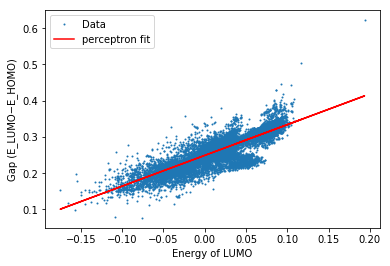

In [5]:
plt.plot(X3, y3, 'o', label='Data', markersize=1)
plt.plot(X3, weights3[0]*X3 + weights3[1], 'r', label='perceptron fit')
plt.legend()
plt.xlabel("Energy of LUMO")  
plt.ylabel("Gap (E_LUMO−E_HOMO)")
plt.show()